### Import all Model Classes and PreProcess the Data

In [7]:
import PreProcessData as pre
import imp
import numpy as np
import pandas as pd
imp.reload(pre)
X_train, X_valid, y_train, y_valid = pre.PreProcessData()
y_valid = [0 if int(y) == 2 or int(y) == 3 else y for y in y_valid]
y_valid = np.array(y_valid)
y_valid = y_valid.reshape(-1,1)
# print(X_train)

### Construct Logistic Regression Model

In [2]:
model = pre.LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train)

### Construct Neural Network Model

In [31]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 256 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.0002
epochs = 4000

model1 = pre.NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model1.train(np.array(X_train), np.array(y_train), epochs)

Epoch 100, Loss: nan
Epoch 200, Loss: nan
Epoch 300, Loss: nan
Epoch 400, Loss: nan
Epoch 500, Loss: nan
Epoch 600, Loss: nan
Epoch 700, Loss: 0.5346
Epoch 800, Loss: 0.4686
Epoch 900, Loss: 0.5935
Epoch 1000, Loss: 0.5618
Epoch 1100, Loss: 0.5367
Epoch 1200, Loss: 0.5151
Epoch 1300, Loss: 0.4961
Epoch 1400, Loss: 0.4797
Epoch 1500, Loss: 0.4656
Epoch 1600, Loss: 0.4533
Epoch 1700, Loss: 0.4425
Epoch 1800, Loss: 0.4331
Epoch 1900, Loss: 0.4248
Epoch 2000, Loss: 0.4175
Epoch 2100, Loss: 0.4110
Epoch 2200, Loss: 0.4051
Epoch 2300, Loss: 0.3998
Epoch 2400, Loss: 0.3949
Epoch 2500, Loss: 0.3904
Epoch 2600, Loss: 0.3862
Epoch 2700, Loss: 0.3825
Epoch 2800, Loss: 0.3791
Epoch 2900, Loss: 0.3762
Epoch 3000, Loss: 0.3738
Epoch 3100, Loss: 0.3718
Epoch 3200, Loss: 0.3701
Epoch 3300, Loss: 0.3686
Epoch 3400, Loss: 0.3672
Epoch 3500, Loss: 0.3660
Epoch 3600, Loss: 0.3648
Epoch 3700, Loss: 0.3636
Epoch 3800, Loss: 0.3624
Epoch 3900, Loss: 0.3613
Epoch 4000, Loss: 0.3602


### Construct Decision Tree Model

In [8]:
tree1 = pre.DecisionTree(max_depth=7)
tree1.fit(np.array(X_train), np.array(y_train))

### Construct Random Forest Model

In [5]:
forest1 = pre.RandomForest(n_estimators=7, max_depth=7)
forest1.fit(np.array(X_train), np.array(y_train))

### Compare Model Accuracies

In [32]:
y_predicted_per, y_predicted_bool = model.predict(X_valid)
y_predicted_bool = np.array(y_predicted_bool)
print("Logistic Regression Model Accuracy:",model.validate(y_predicted_bool, y_valid))

predictions1 = np.array(model1.predict(X_valid))
print("Neural Network Model Accuracy", model1.validate(predictions1, y_valid))

predictions2 = tree1.predict(np.array(X_valid))
print("Decision Tree Model Accuracy", tree1.validate(predictions2, y_valid))

predictions3 = forest1.predict(np.array(X_valid))
print("Random Forest Model Accuracy", forest1.validate(predictions3, y_valid))

Logistic Regression Model Accuracy: 0.7219610476830087
Neural Network Model Accuracy 0.7004701141705842
Decision Tree Model Accuracy 0.707186030893217
Random Forest Model Accuracy 0.7280053727333781


### Compare Model Plots

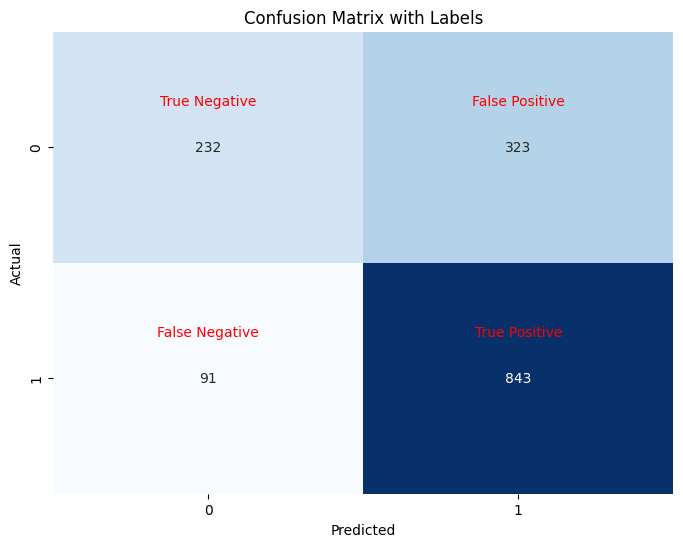

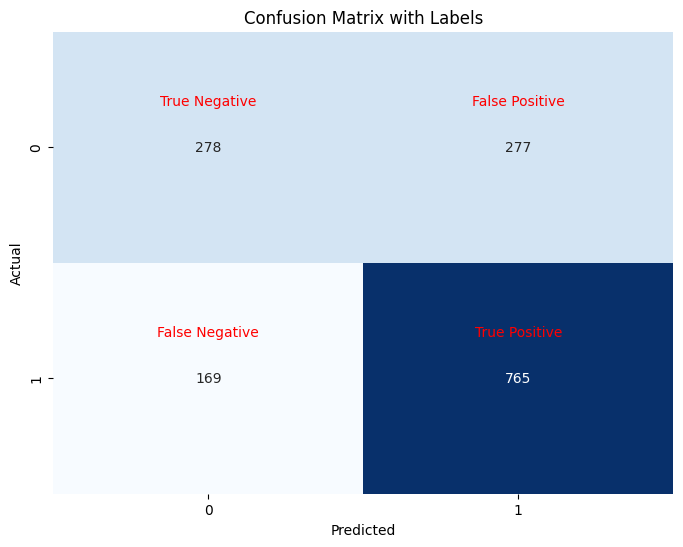

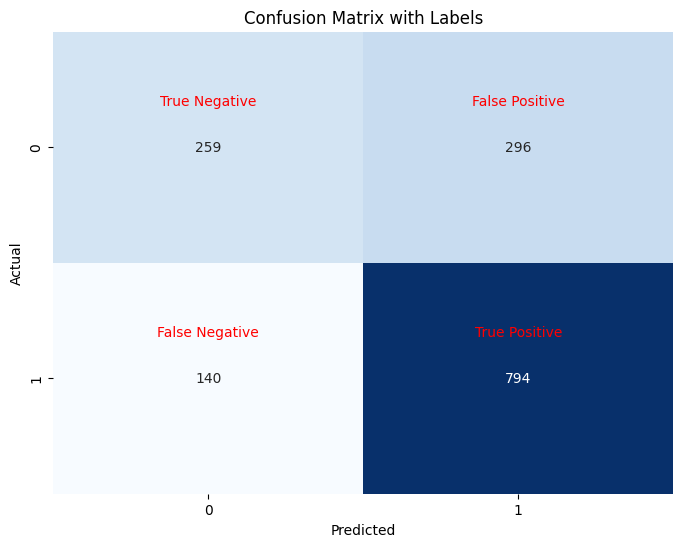

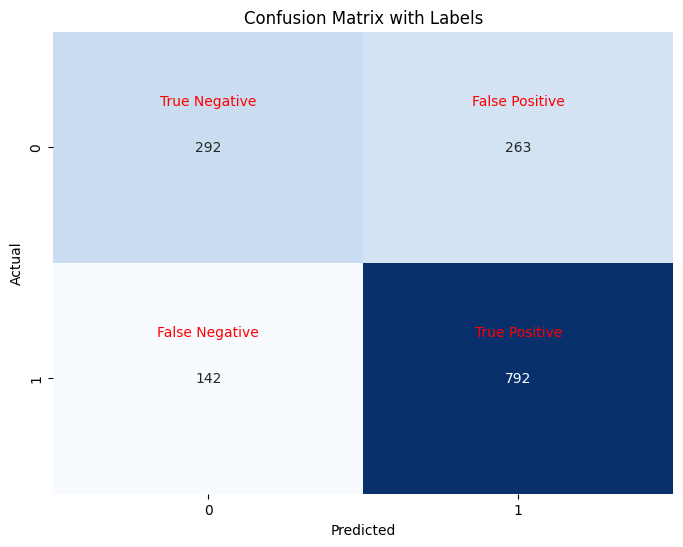

In [33]:
model.plot(y_predicted_bool, y_valid)
model1.plot(predictions1, y_valid)
tree1.plot(predictions2, y_valid)
forest1.plot(predictions3, y_valid)

### Conclusion

The most accurate model here with the most consistency is the Random Forest model with an accuracy of 72.8%, precision 75%.

The most true positives however is the Logistic Regression model with an accuracy of 72.2%, precision 72.2%.